# Heart Attack Analysis: EDA and prediction

Age: Age in yrs

sex: Sex(0=female;1=male)

cp: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic) 

trtbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/di

fbs: fasting blood sugar > 120 mg/di (0 = false; 1 = true)

restecg: resting electrocardiographic results (0 = normal; 1 = hypertrophy; 2 = having ST-T wave abnormality) 

thalachh: maximum heart rate achieved

exng: exercise induced angina (0 = no; 1 = yes)

oldpeak: ST depression induced by exercise relative to rest

sip: the slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping) 

caa: number of major vessels (0-4) colored by flourosopy

thall: thallium stress test (1 = fixed defect; 2 = reversable defect; 3 = normal)

output: 0 = less chance of heart attack; 1 = more chance of heart attack


In [61]:
# imported Libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('heart.csv')

In [63]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [66]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [67]:
df.shape

(303, 14)

In [68]:
type(df)

pandas.core.frame.DataFrame

In [69]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Cleaning
Checking for Duplicate Values

In [70]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [71]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [72]:
# Observes the duplicates and removes them
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(302, 14)

In [73]:
df.iloc[164:165,]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


# Check for Null Values

In [74]:
df.isna().sum() 
# df.isnull().sum()
# df.dropna()       used to drop the rows with missing values; if there are null values in the dataset, it will drop the rows with null values
# df.fillna()       used to fill the missing values with a specific value if there are null values ; used to fill them with mean or median values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Check for Outliers

<Axes: >

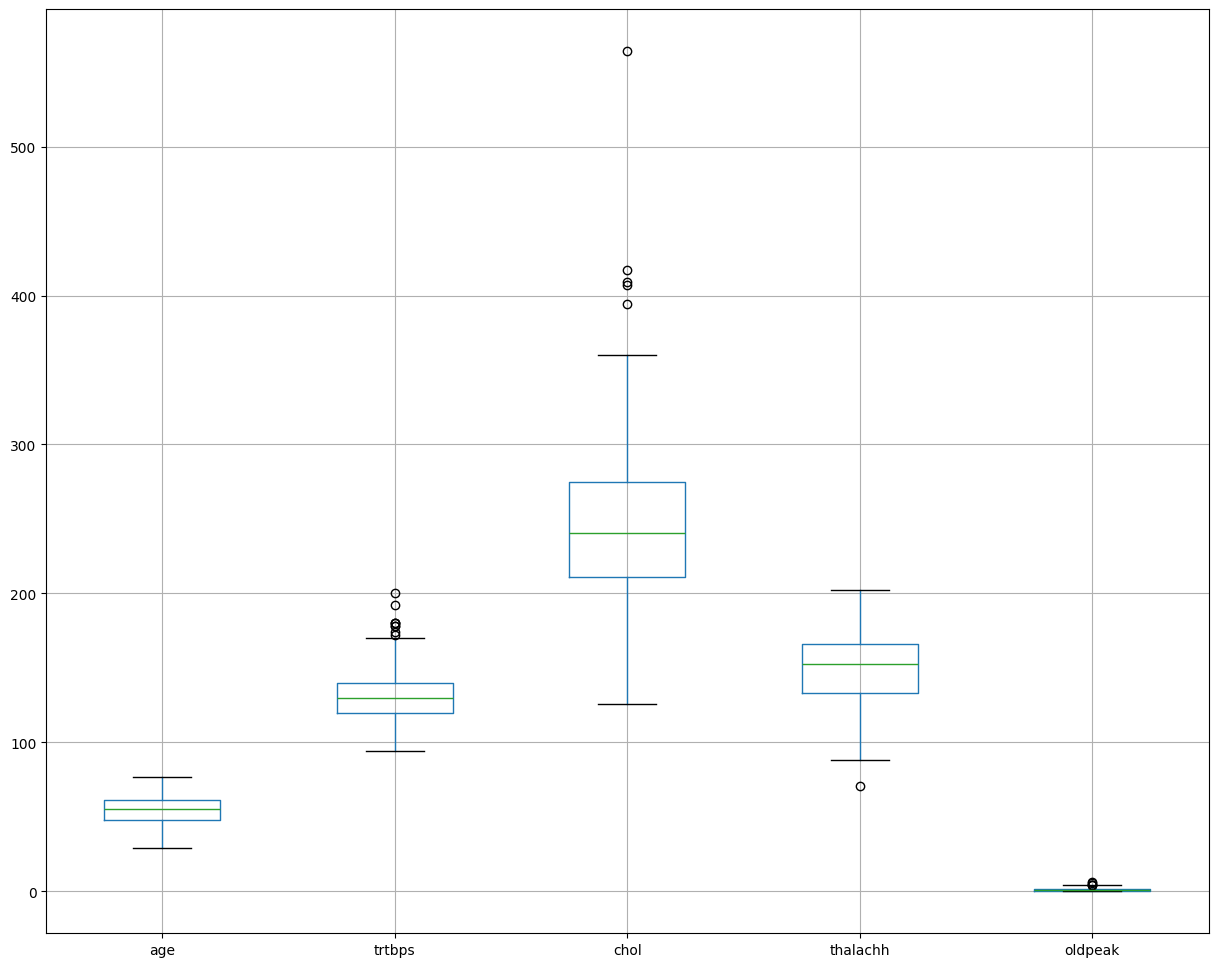

In [75]:
#Checking for outliers in numeric columns(age, trtbps, chol, thalachh, oldpeak)

plt.figure(figsize=(15,12))
df.boxplot(column= ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'])

Finding values of outliers(IQR method):
1. Sort the dataset in ascending order,
2. calculate the 1st and 3rd quartiles(Ql, Q3)
3. compute IQR=Q3-Ql,
4. compute Lower bound= (Ql-1.S*IQR), upper bound= (Q3+1.5*IQR),
5. Loop through the values of the dataset and check for those who fall below the Lower bound and above the upper bound and mark them as outliers


In [76]:
# Finding the outliers in the dataset
def detect_outliers(data):
    outlier_list = []
    data = sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    # print("the value of Q1 and Q3", q1, q3)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    # print("the value of lower bound and upper bound", lower_bound, upper_bound)

    for i in data:
        if i < lower_bound or i > upper_bound:
            outlier_list.append(i)
    return outlier_list

for i in ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']:
    print("The outliers in the column", i, "are", detect_outliers(df[i]))

The outliers in the column age are []
The outliers in the column trtbps are [172, 174, 178, 178, 180, 180, 180, 192, 200]
The outliers in the column chol are [394, 407, 409, 417, 564]
The outliers in the column thalachh are [71]
The outliers in the column oldpeak are [4.2, 4.2, 4.4, 5.6, 6.2]


In [77]:
# Handling outliers using Quantile based flooring and capping method.
# The outlier is capped at a certain value above the 90th percentile value or floored at a fact<
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):
    percentile_10th = np.percentile(data,10)
    percentile_90th = np.percentile(data,90)
    b = np.where(data < percentile_10th, percentile_10th, data)
    b1 = np.where(b > percentile_90th, percentile_90th, b)
    return b1

for i in ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']:
    df[i] = handle_outliers(df[i])

<Axes: >

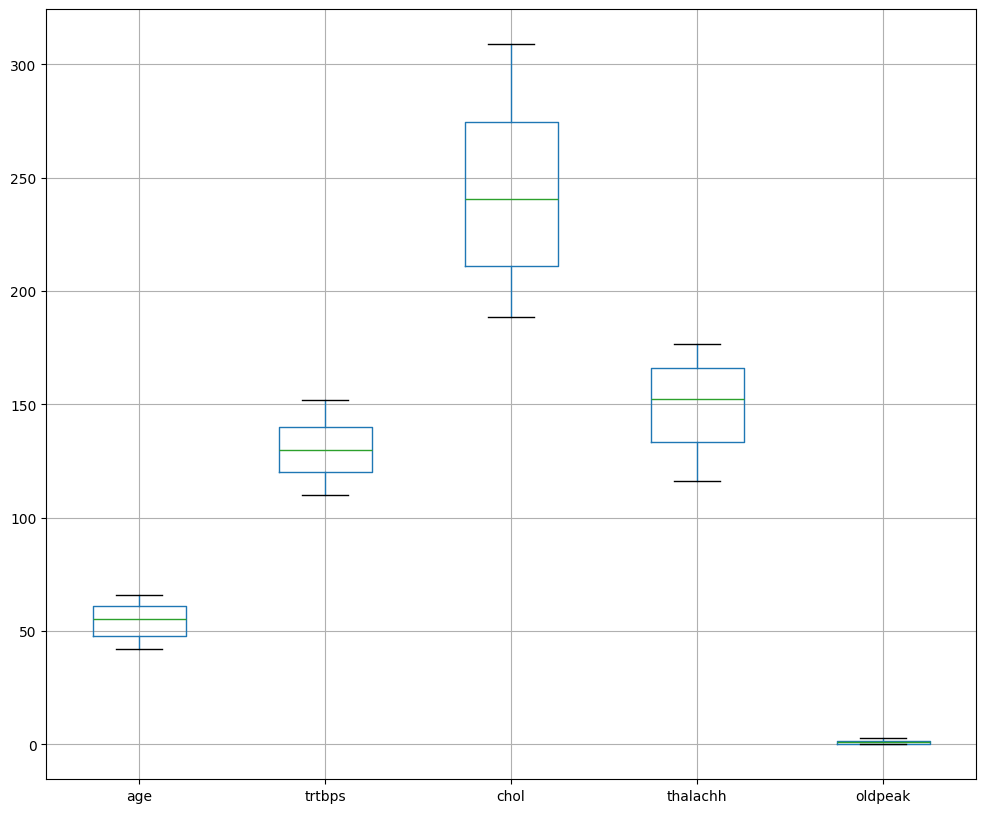

In [78]:
# Verifying the outliers after handling with Boxplot
plt.figure(figsize=(12,10))
df.boxplot(column= ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'])

# Visualization
Here we will get an idea about the patients by considering all the features separately

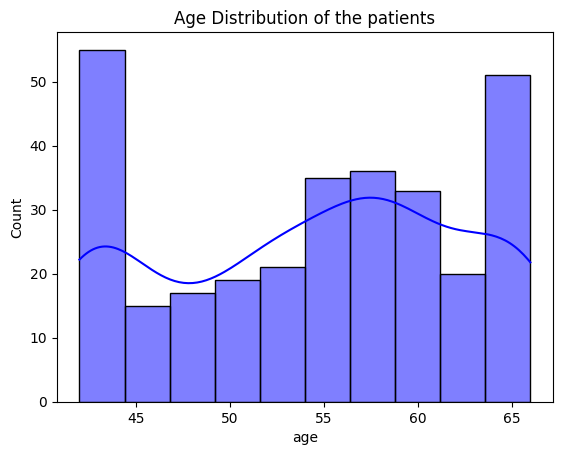

In [79]:
# For Age column
sns.histplot(df.age , kde=True,color='blue') 
plt.title('Age Distribution of the patients')
plt.show()

In [80]:
df.sex.value_counts()

sex
1    206
0     96
Name: count, dtype: int64

0:Female
1:male
we almost have twice the number of males than females

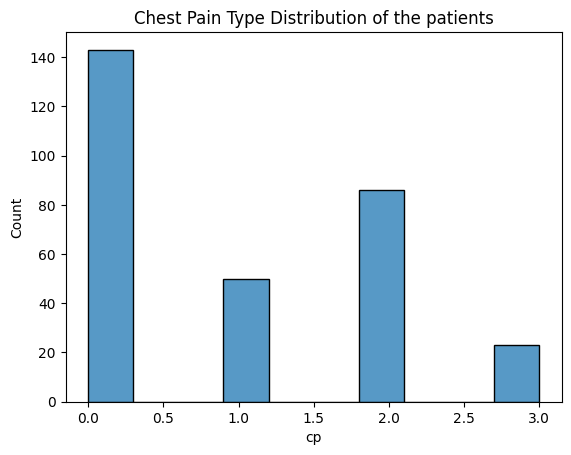

In [81]:
sns.histplot(df.cp)
plt.title('Chest Pain Type Distribution of the patients')
plt.savefig('c11.png')
plt.show()

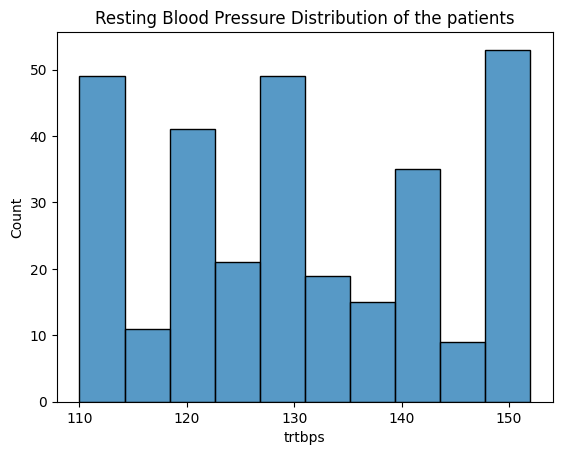

In [82]:
sns.histplot(df.trtbps)
plt.title('Resting Blood Pressure Distribution of the patients')
plt.show()

According to the European Society of Cardiology, the following classification for blood pressure is applied:

Category	                Blood pressure

Optimal	                    < 120

Normal	                    120-129
High normal	                130-139	
Grade 1 hypertension		140-159
Grade 2 hypertension		160-179
Grade 3 hypertension		>=180

In our dataset, the resting blood pressure distribution has a peak at a value of approx. 150


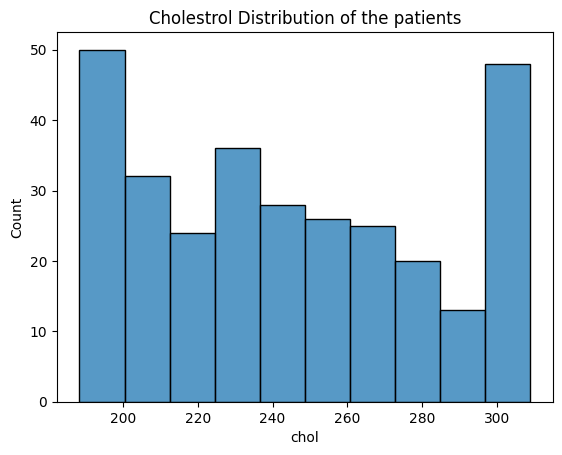

In [83]:
sns.histplot(df.chol)
plt.title('Cholestrol Distribution of the patients')
plt.show()

The following interpretation of cholesterol level is usually used (this information was taken from wikipedia):
Cholesterol, mg/dl          Interpretation
< 200	                    Desirable
200-239	                    Borderline
> 240  	                    High

In our dataset some patients have an extremely high level of cholesterol.


In [84]:
df.fbs.value_counts()   

fbs
0    257
1     45
Name: count, dtype: int64

Reminder: 0 means less or equal to 120 mg/di (which is good), 1 means higher than 120 mg/di.
 The majority of the patients don't have serious sugar problems.
0 = normal; 1 = hypertrophy; 2 = having ST-T wave abnormality

About 50% of the patients have hypertrophy. Only a few of the patients have ST-T wave abnormality. The rest of them have normal results.

In our dataset, highest value for thalachh is apprx. 170-180


In [85]:
df.output.value_counts()

output
1    164
0    138
Name: count, dtype: int64

0 = less chance of heart attack; 1 = more chance of heart attack


54.3% of the patients have a high risk of heart attack, 45.7% - low risk of a heart attack.


The conclusion is that people with good health condition has a lower chance to a heart attack.


Text(0.5, 1.0, 'Correlation between the features of the dataset')

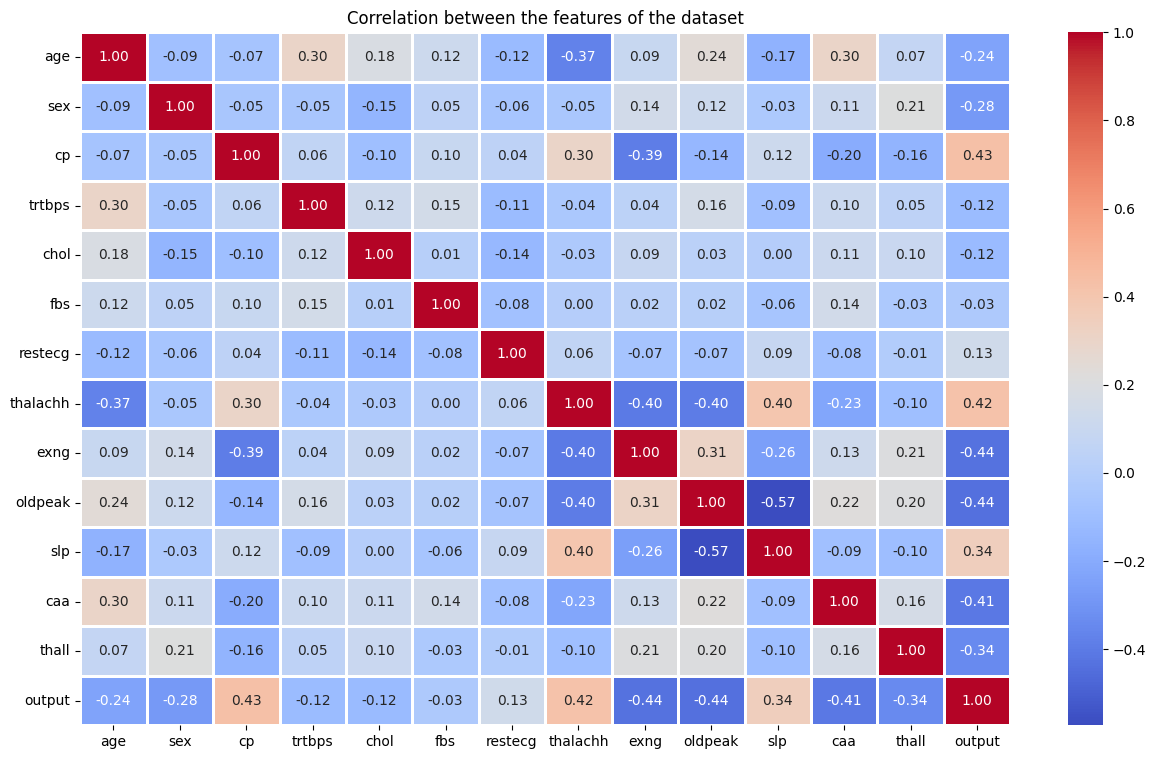

In [86]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), annot=True,cmap = 'coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation between the features of the dataset')


From the above heatmap we can observe that the features 'cp', 'thalachh', 'sip' are highly correlated to output (target variable).


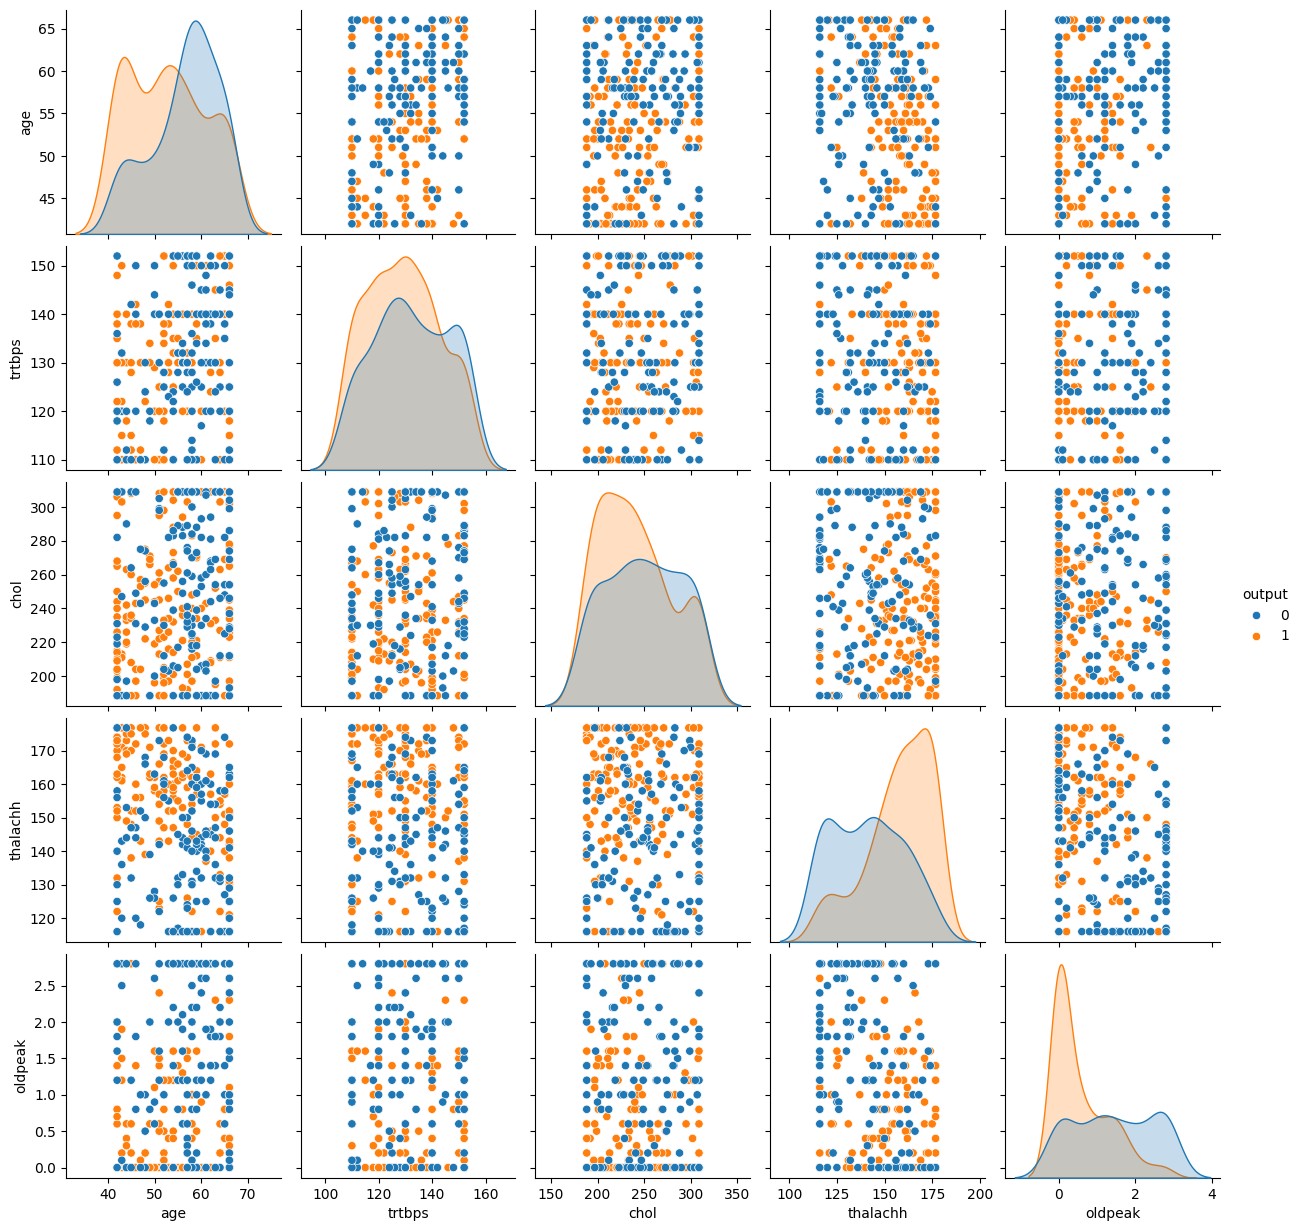

In [90]:
sns.pairplot(df[['age','trtbps','chol','thalachh','oldpeak','output']],hue='output')

From the above pair plot we can conclude that our dataset is not linearly separable.

#Conclusion(Visualization):

1.	The majority of the patients are older than 40.

2.	ln the dataset there are 2 times more males than females.

3.54.3% of the patients have a high risk of heart attack, 45.7% - low risk of a heart attack.

4.	Age distribution of patients from the high-risk group has a peak at 57-58 ages.

5.	Patients that have normal analysis results (such as electrocardiography or thallium stress test) are less likely to have a heart attack.
 
6.	The major factors influencing heart attacks are: Chest pain, Maximum heart rate achieved, Exercise induced angina, ST depression induced by exercise relative to rest and Number of major vessels



#Feature Scaling

In [91]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,42.0,1,2,130.0,250.0,0,1,176.8,0,2.8,0,0,2,1
2,42.0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1,1,120.0,236.0,0,1,176.8,0,0.8,2,0,2,1
4,57.0,0,0,120.0,308.9,0,1,163.0,1,0.6,2,0,2,1


In [96]:
from sklearn.preprocessing import StandardScaler
#-infinity to +infinity
#z = (x-mean)/std

Scaler = StandardScaler()
df[['age','trtbps','chol','thalachh']] = Scaler.fit_transform(df[['age','trtbps','chol','thalachh']])

In [97]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,1.075082,1,3,1.064668,-0.298585,1,0,0.000372,0,2.3,0,0,1,1
1,-1.573780,1,2,-0.038476,0.135392,0,1,1.369395,0,2.8,0,0,2,1
2,-1.573780,0,1,-0.038476,-1.038899,0,0,1.124197,0,1.4,2,0,2,1
3,0.192128,1,1,-0.773906,-0.222001,0,1,1.369395,0,0.8,2,0,2,1
4,0.318264,0,0,-0.773906,1.638995,0,1,0.664450,1,0.6,2,0,2,1


In [98]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,1.075082,1,3,1.064668,-0.298585,1,0,0.000372,0,2.3,0,0,1,1
1,-1.573780,1,2,-0.038476,0.135392,0,1,1.369395,0,2.8,0,0,2,1
2,-1.573780,0,1,-0.038476,-1.038899,0,0,1.124197,0,1.4,2,0,2,1
3,0.192128,1,1,-0.773906,-0.222001,0,1,1.369395,0,0.8,2,0,2,1
4,0.318264,0,0,-0.773906,1.638995,0,1,0.664450,1,0.6,2,0,2,1


In [99]:
from sklearn.preprocessing import MinMaxScaler
#0 to 1
#z = (x-min(x))/(max(x)-min(x))
scale = MinMaxScaler()
df[['age','trtbps','chol','thalachh']] = scale.fit_transform(df[['age','trtbps','chol','thalachh']])

In [100]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.875000,1,3,0.833333,0.370124,1,0,0.559211,0,2.3,0,0,1,1
1,0.000000,1,2,0.476190,0.511203,0,1,1.000000,0,2.8,0,0,2,1
2,0.000000,0,1,0.476190,0.129461,0,0,0.921053,0,1.4,2,0,2,1
3,0.583333,1,1,0.238095,0.395021,0,1,1.000000,0,0.8,2,0,2,1
4,0.625000,0,0,0.238095,1.000000,0,1,0.773026,1,0.6,2,0,2,1


# Data Preparation

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
feature_columns = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']
X = df[feature_columns]
y = df['output']

So, we are preparing the data by spliting the features as X and Y ,Here X defines the feature columns and Y defines the target variable

In [110]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200) 

In [111]:
X_train.shape

(241, 13)

In [112]:
X_test.shape

(61, 13)

In [113]:
df.shape

(302, 14)

In [114]:
y_train.shape

(241,)

Here Splitting the dataset into train set and test set with the size of 80% and 20%